In [9]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

In [2]:
auto = pd.read_csv('Automobile.csv')

In [3]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Plotting univariate distributions

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).  



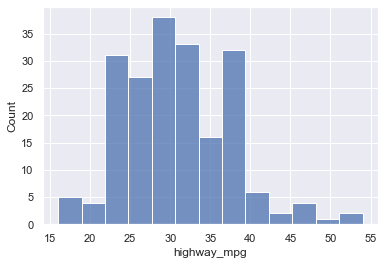

In [8]:
sns.histplot(auto['highway_mpg']);

In [ ]:
# we can turn the kde off and put a tic mark along the x-axis for every data point with rug
sns.distplot(auto['city_mpg'], kde=False, rug=True);

## Plotting bivariate distributions

It can also be useful to visualize a relationship between two variables. The easiest way to do this in seaborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes.



In [ ]:
sns.jointplot(auto['engine_size'], auto['horsepower']);

### Hex Bin Plots

We can make a hex bin plot that breaks the 2D area into hexagons and the number of points in each hexagon determines the color

In [ ]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="hex");

### Kernel Density Estimation

We can make a 2D estimation of the density also

In [ ]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="kde");

## Visualizing pairwise relationships in a dataset

To plot multiple pairwise scatterplots in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame, it also draws the histogram of each variable on the diagonal Axes:

Be careful about toggle scrolling in the cell menu!!!

In [ ]:
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']]);

## Plotting with categorical data



In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using “jitter"

In [ ]:
sns.stripplot(auto['fuel_type'], auto['horsepower'], jitter=True);

A different approach would be to use the function swarmplot(), which positions each scatterplot point on the categorical axis and avoids overlapping points:

In [ ]:
sns.swarmplot(auto['fuel_type'], auto['horsepower']);

## Boxplots

Another common graph is a boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 

In [ ]:
sns.boxplot(auto['number_of_doors'], auto['horsepower']);

In [ ]:
sns.boxplot(auto['number_of_doors'], auto['horsepower'], hue=auto['fuel_type']);

## Bar plots

We can plot the mean of a a dataset, separated in categories using the barplot() function. When there are multiple observations in each category, it uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

Bar plots start at 0, which can sometimes be practical if zero is a number you want to compare to

In [ ]:
sns.barplot(auto['body_style'], auto['horsepower'], hue=auto['fuel_type']);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing the mean of a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

In [ ]:
sns.countplot(auto['body_style'],hue=auto['fuel_type']);

## Point plots

An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

In [ ]:
sns.pointplot(auto['body_style'], auto['horsepower'], hue=auto['number_of_doors']);

## Drawing multi-panel categorical plots

In [ ]:
sns.catplot(x="fuel_type",
               y = "horsepower",
               hue="number_of_doors", 
               col="drive_wheels", 
               data=auto, 
               kind="box");


Various types of kind input : {``point``, ``bar``, ``count``, ``box``, ``violin``, ``strip``}

## Function to draw linear regression models

lmplot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables

In [ ]:
sns.lmplot(y="horsepower", x="engine_size", data=auto);

In [ ]:
sns.lmplot(y="horsepower", x="engine_size",hue="fuel_type", data=auto);




# Assessment

In [1]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set_palette("deep") #to avoid difference in color palette
%matplotlib inline 
# tells python to actually display the graphs

In [6]:
df= pd.read_csv('startup_funding.csv')

In [7]:
df.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,year_funding,month_funding
0,BYJU’S,Education,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000,2020,1
1,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,2020,1
2,Mamaearth,eCommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,2020,1
3,https://www.wealthbucket.in/,Finance,Online Investment,Delhi,Vinod Khatumal,Pre-Series A,3000000,2020,1
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed/Angel Funding,1800000,2020,1


In [8]:
df.describe()

,Amount in USD,year_funding,month_funding
count,9.870000e+02,987.000000,987.000000
mean,1.979586e+07,2017.305978,6.805471
std,1.118273e+08,0.898271,3.538065
min,2.250000e+04,2016.000000,1.000000
25%,5.000000e+05,2017.000000,4.000000
50%,2.000000e+06,2017.000000,7.000000
75%,9.050000e+06,2018.000000,10.000000
max,2.500000e+09,2020.000000,12.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InvestmentnType', ylabel='count'>

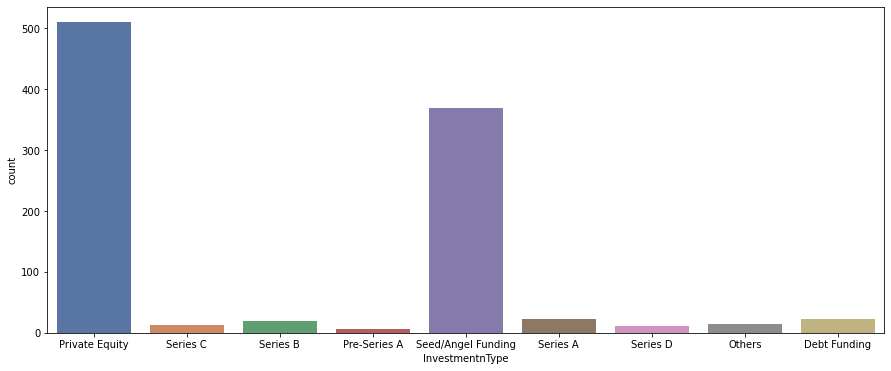

In [9]:
plt.figure(figsize = (15,6))

sns.countplot(df['InvestmentnType'])

<AxesSubplot:xlabel='month_funding', ylabel='Amount in USD'>

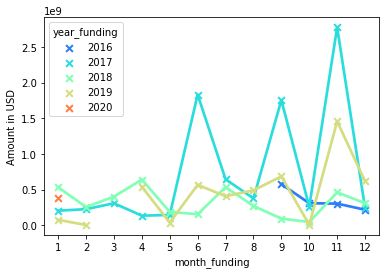

In [10]:
sns.pointplot(x = df['month_funding'],y = df['Amount in USD'],hue = df['year_funding'],markers = 'x',estimator=sum,ci = None,legend = 'full',palette = 'rainbow')

In [14]:
df[df['Industry Vertical'] == 'Transportation'].head(15)

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,year_funding,month_funding
1,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,2020,1
22,eBikeGo,Transportation,Electric bike rental,Amritsar,Startup Buddy,Seed/Angel Funding,300000,2019,11
25,Vogo Automotive,Transportation,Scooter sharing app,Bangalore,"Matrix Partners, Stellaris Venture Partners, K...",Series B,4000000,2019,11
49,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,55000000,2019,8
72,Vogo Automotive Pvt. Ltd.,Transportation,Dockless Scooter Rental Company,Bangalore,Alteria Capital,Debt Funding,3584000,2019,6
74,BlackBuck,Transportation,Logistics,Bangalore,Goldman Sachs Investment Partners and Silicon ...,Series D,150000000,2019,6
90,Shuttl,Transportation,Bus Aggregation,Gurugram,New Atlantic Ventures,Others,5000000,2019,4
111,DriveU,Transportation,On-Demand Drivers,Bangalore,Stevens Creek Ventures,Others,1000000,2018,12


In [15]:
df[df['Industry Vertical'] == 'Transportation'].sort_values('Amount in USD',ascending = False).head(15)

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,year_funding,month_funding
74,BlackBuck,Transportation,Logistics,Bangalore,Goldman Sachs Investment Partners and Silicon ...,Series D,150000000,2019,6
49,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,55000000,2019,8
1,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,2020,1
90,Shuttl,Transportation,Bus Aggregation,Gurugram,New Atlantic Ventures,Others,5000000,2019,4
25,Vogo Automotive,Transportation,Scooter sharing app,Bangalore,"Matrix Partners, Stellaris Venture Partners, K...",Series B,4000000,2019,11
72,Vogo Automotive Pvt. Ltd.,Transportation,Dockless Scooter Rental Company,Bangalore,Alteria Capital,Debt Funding,3584000,2019,6
111,DriveU,Transportation,On-Demand Drivers,Bangalore,Stevens Creek Ventures,Others,1000000,2018,12
22,eBikeGo,Transportation,Electric bike rental,Amritsar,Startup Buddy,Seed/Angel Funding,300000,2019,11
